We'll implement two linear classification algorithms which are using all the previous material: probabilities, gradient descent, etc.: 

Logistic regression                                                                                                     
https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F                                                                                  
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html                                                     
Support Vector Machines (direct optimization without dual problem and kernel trick)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y1 = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2 = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1 = np.array(range(len(y1)))
x2 = np.array([c+50 for c in range(len(y2))])

In [3]:
# data matrix 
a1 = np.concatenate((x1.reshape(-1,1),y1,np.array([1 for c in range(len(x1))]).reshape(-1,1)), 1)
a2 = np.concatenate((x2.reshape(-1,1),y2,np.array([0 for c in range(len(x2))]).reshape(-1,1)), 1)

A = np.concatenate((a1,a2), 0).round(1)
np.random.shuffle(A)

In [4]:
A.shape, y1.shape[0], y2.shape[0]

((159, 3), 76, 83)

In [5]:
A[:5,:]

array([[22. ,  2.3,  1. ],
       [67. ,  3. ,  0. ],
       [18. ,  2.2,  1. ],
       [59. ,  2.3,  1. ],
       [51. ,  2.4,  1. ]])

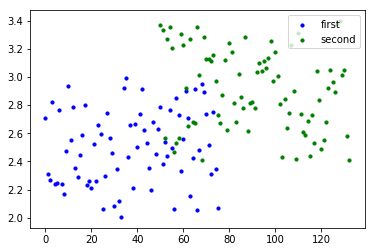

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', marker="o", label='first')
ax1.scatter(x2, y2, s=10, c='g', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

In [7]:
# centering 
A[:,:2] = A[:,:2]-A[:,:2].mean(0)

In [8]:
A[:5,:2]

array([[-43.42767296,  -0.41509434],
       [  1.57232704,   0.28490566],
       [-47.42767296,  -0.51509434],
       [ -6.42767296,  -0.41509434],
       [-14.42767296,  -0.31509434]])

In [9]:
temp = np.ones((A.shape[0], A.shape[1]+1))
temp[:,1:] = A.copy()
X = np.copy(temp[:,:-1])
y = np.copy(temp[:,-1])

In [10]:
X[:5]

array([[  1.        , -43.42767296,  -0.41509434],
       [  1.        ,   1.57232704,   0.28490566],
       [  1.        , -47.42767296,  -0.51509434],
       [  1.        ,  -6.42767296,  -0.41509434],
       [  1.        , -14.42767296,  -0.31509434]])

In [11]:
y

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0.])

In [12]:
def sigm(x):
    return 1/(np.exp(-x)+1)

In [13]:
def accuracy_score(y, y_pred):
    return (y == y_pred).astype(int).sum()/y.shape[0]

In [14]:
def train(X_, y_, batch_size, epochs, eta):
    theta = np.random.rand(X_.shape[1])
    
    for i in range(epochs):
        if i %20 == 0:
            print('accuracy: ', accuracy_score(y_, sigm(theta.T@ X_.T).squeeze()>0.5))
        rand_idxs = np.random.randint(X_.shape[0], size=batch_size)
        X_Batch = X_[rand_idxs]
        Y_batch = y_[rand_idxs]
        grad = 0
        batch_loss = 0
        for xx, yy in zip(X_Batch, Y_batch):
            grad += xx*(sigm(theta.T@xx)-yy)
            batch_loss += (1-yy)*np.log(1-sigm(theta.T@xx) + 1e-6) + yy*np.log(sigm(theta.T@xx)+ 1e-6)
        if i %20 == 0:
            print('batch loss: ', -batch_loss)
        theta = theta - (1/X_Batch.shape[0])*eta*grad
    
    return theta

In [15]:
theta = train(X, y, 64, 1000, 0.001)

accuracy:  0.16352201257861634
batch loss:  650.2680907834855
accuracy:  0.16352201257861634
batch loss:  381.567618405901
accuracy:  0.8113207547169812
batch loss:  26.590463290040212
accuracy:  0.8301886792452831
batch loss:  18.866713684920217
accuracy:  0.8301886792452831
batch loss:  27.299609045193943
accuracy:  0.8238993710691824
batch loss:  19.071606648325677
accuracy:  0.8238993710691824
batch loss:  20.591168238567143
accuracy:  0.8238993710691824
batch loss:  20.584409703158713
accuracy:  0.8238993710691824
batch loss:  26.126868665228937
accuracy:  0.8238993710691824
batch loss:  19.537414608117484
accuracy:  0.8238993710691824
batch loss:  22.2658548788457
accuracy:  0.8301886792452831
batch loss:  17.931231014008784
accuracy:  0.8301886792452831
batch loss:  23.928385458511404
accuracy:  0.8301886792452831
batch loss:  18.4353342934421
accuracy:  0.8238993710691824
batch loss:  27.044779668486115
accuracy:  0.8301886792452831
batch loss:  12.841764868120476
accuracy:  0.

In [16]:
# test dataset

y1_test = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2_test = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1_test = np.array(range(len(y1_test)))
x2_test = np.array([c+50 for c in range(len(y2_test))])

a1_test = np.concatenate((x1_test.reshape(-1,1),y1_test,np.array([1 for c in range(len(x1_test))]).reshape(-1,1)), 1)
a2_test = np.concatenate((x2_test.reshape(-1,1),y2_test,np.array([0 for c in range(len(x2_test))]).reshape(-1,1)), 1)

A_test = np.concatenate((a1_test,a2_test), 0).round(1)
np.random.shuffle(A_test)

In [17]:
# centering
A_test[:,:2] = A_test[:,:2]-A_test[:,:2].mean(0)

In [18]:
temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
temp_test[:,1:] = A_test.copy()
X_test = np.copy(temp_test[:,:-1])
y_test = np.copy(temp_test[:,-1])

In [19]:
X_test[:5,:]

array([[ 1.00000000e+00, -1.71597222e+01, -7.23611111e-01],
       [ 1.00000000e+00, -4.21597222e+01, -3.23611111e-01],
       [ 1.00000000e+00,  7.84027778e+00, -2.36111111e-02],
       [ 1.00000000e+00,  4.84027778e+00,  2.76388889e-01],
       [ 1.00000000e+00, -5.51597222e+01, -2.36111111e-02]])

In [20]:
y_test[:5]

array([1., 1., 1., 0., 1.])

In [21]:
def pred_logistic_regr(theta, data):
    return (sigm(theta.T@ data.T).squeeze()>0.5).astype(int)

In [22]:
y_pred_test = pred_logistic_regr(theta, X_test)

In [23]:
y_pred_test[:5]

array([1, 1, 0, 1, 1])

In [24]:
accuracy_score(y_test,y_pred_test)

0.8402777777777778

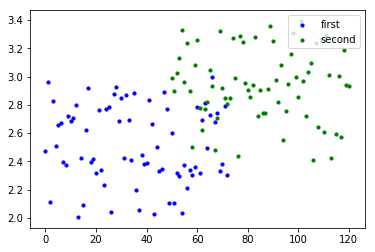

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1_test, y1_test, s=10, c='b', marker="o", label='first')
ax1.scatter(x2_test, y2_test, s=10, c='g', marker="o", label='second')
ax1.plot
plt.legend(loc='upper right');
plt.show()

In [26]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

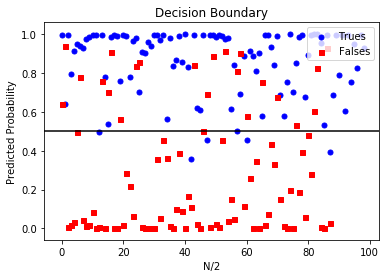

In [27]:
# plot for train  data
trues = sigm(theta.T@ X.T).squeeze()*((y + sigm(theta.T@ X.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X.T).squeeze()*(1-y + (sigm(theta.T@ X.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [28]:
# train accuracy
accuracy_score(y, pred_logistic_regr(theta, X))

0.8238993710691824

In [29]:
# test accuracy
accuracy_score(y_test, pred_logistic_regr(theta, X_test))

0.8402777777777778

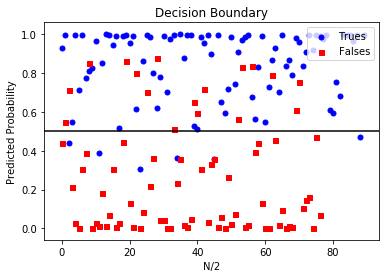

In [30]:
# plot for test  data
trues = sigm(theta.T@ X_test.T).squeeze()*((y_test + sigm(theta.T@ X_test.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X_test.T).squeeze()*(1-y_test + (sigm(theta.T@ X_test.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [31]:
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')

In [32]:
lr.fit(X,y)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_test_lr = lr.predict(X_test)
y_test_lr

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0.])

In [34]:
y_pred_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [35]:
accuracy_score(y_test_lr, y_test)

0.8888888888888888

In [36]:
accuracy_score(y_pred_test, y_test)

0.8402777777777778

In [37]:
y_pred_test[:5]

array([1, 1, 0, 1, 1])

In [38]:
y_test[:5]

array([1., 1., 1., 0., 1.])

In [39]:
def conf_mat(y_pred, y_test):
    classes = set(map(int, list(y_pred) + list(y_test)))
    conf_m = np.zeros((len(classes), len(classes)))
    for class_ in classes:
        for class2_ in classes:
            conf_m[class_, class2_] = ((np.array(y_pred_test) == class_) * (np.array(y_test) == class2_)).sum()
    return conf_m.astype(int)

In [40]:
cm = conf_mat(y_pred_test, y_test)
cm

array([[54,  6],
       [17, 67]])

In [41]:
precision = np.diag(cm) / np.sum(cm, axis = 1)
recall = np.diag(cm) / np.sum(cm, axis = 0)
precision[1], recall[1]

(0.7976190476190477, 0.9178082191780822)

In [42]:
f1 = 2 * (precision[1] * recall[1])/(precision[1] + recall[1])
f1

0.8535031847133758

In [43]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test)

0.8535031847133758

simple SVM                                                                                                                  
https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2

In [44]:
y[y==0] = -1
y

array([ 1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.])

In [45]:
def pred_svm(theta_svm, data):
    return np.sign(theta_svm.T@ data.T)

In [46]:
def train_svm(X_, y_, c, batch_size, epochs, eta):
    theta = np.random.rand(X_.shape[1])
    
    for i in range(epochs):
        if i %20 == 0:
            print('accuracy: ', accuracy_score(y_, pred_svm(theta, X_)))
        rand_idxs = np.random.randint(X_.shape[0], size=batch_size)
        X_Batch = X_[rand_idxs]
        Y_batch = y_[rand_idxs]
        grad = 0
        batch_loss = 0
        for xx, yy in zip(X_Batch, Y_batch):
            if 1 - yy*(theta.T@xx) > 0:
                grad += theta - c*yy*xx
                max_ = 1 - yy*(theta.T@xx)
            else:
                grad += theta
                max_ = 0
            batch_loss += (1/c * max_) + 1/2*theta.T@theta
        if i %20 == 0:
            print('batch loss: ', batch_loss/X_Batch.shape[0])
#         print("-----"*20)
        theta = theta - (1/X_Batch.shape[0])*eta*grad
    
    return theta

In [56]:
theta_svm = train_svm(X, y, 0.05, 64, 1000, 0.0005)

accuracy:  0.16352201257861634
batch loss:  256.29256781475647
accuracy:  0.16352201257861634
batch loss:  241.96455121233882
accuracy:  0.16352201257861634
batch loss:  204.092551103059
accuracy:  0.15723270440251572
batch loss:  182.80224264159307
accuracy:  0.15723270440251572
batch loss:  192.8051215288976
accuracy:  0.15723270440251572
batch loss:  198.94638882483108
accuracy:  0.16352201257861634
batch loss:  189.4812406717533
accuracy:  0.16352201257861634
batch loss:  172.32544503556244
accuracy:  0.16352201257861634
batch loss:  169.29810867809007
accuracy:  0.16352201257861634
batch loss:  150.24169170656316
accuracy:  0.16352201257861634
batch loss:  129.62557702134427
accuracy:  0.16352201257861634
batch loss:  133.08500333037568
accuracy:  0.16352201257861634
batch loss:  104.67628160455783
accuracy:  0.16352201257861634
batch loss:  107.12849559831444
accuracy:  0.16352201257861634
batch loss:  107.30198916655313
accuracy:  0.16352201257861634
batch loss:  89.259830100194

In [57]:
theta_svm

array([ 0.47351732, -0.05292242,  0.07128258])

In [58]:
pred_svm(theta_svm, X_test)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.])

In [59]:
y_test[y_test==0] = -1
y_test

array([ 1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.])

In [60]:
# train accuracy with svm
accuracy_score(y, pred_svm(theta_svm, X))

0.8301886792452831

In [61]:
# test accuracy with svm 
accuracy_score(y_test, pred_svm(theta_svm, X_test))

0.8333333333333334

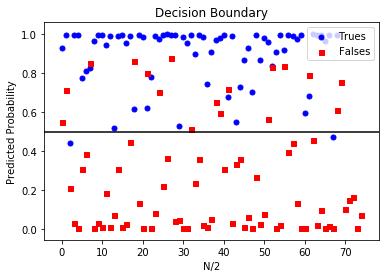

In [62]:
# plot for test  data
trues_svm = sigm(theta.T@ X_test.T).squeeze()*((y_test + pred_svm(theta_svm, X_test) > 0) > 0)
falses_svm = sigm(theta.T@ X_test.T).squeeze()*(1-y_test + (pred_svm(theta_svm, X_test) < 0) > 0)
plot_decision_boundary(trues_svm[trues_svm != 0], falses_svm[falses_svm != 0])

In [63]:
y_test[y_test==-1]=0
y_svm_test = pred_svm(theta_svm, X_test)
y_svm_test[y_svm_test==-1]=0

In [64]:
cm_svm = conf_mat(y_test, y_svm_test)
cm_svm

array([[55,  5],
       [ 0, 84]])

In [65]:
precision = np.diag(cm_svm) / np.sum(cm_svm, axis = 1)
recall = np.diag(cm_svm) / np.sum(cm_svm, axis = 0)
precision[1], recall[1]

(1.0, 0.9438202247191011)

Evaluation on sklearn breast cancer dataset

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [67]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [69]:
# pred_logistic_regr(theta_log_reg_bc, X_test)
temp_train = np.ones((X_train .shape[0], X_train.shape[1]+1))
temp_train [:,1:] = X_train.copy()
X_train = np.copy(temp_train)

In [70]:
# pred_logistic_regr(theta_log_reg_bc, X_test)
temp_test = np.ones((X_test.shape[0], X_test.shape[1]+1))
temp_test[:,1:] = X_test.copy()
X_test = np.copy(temp_test)

In [71]:
# train logistic regression
theta_log_reg_bc = train(X_train, y_train, 64, 1000, 0.0001)

accuracy:  0.6267605633802817
batch loss:  290.1256787172716
accuracy:  0.8497652582159625
batch loss:  71.78725671991332
accuracy:  0.863849765258216
batch loss:  80.09538029837067
accuracy:  0.8568075117370892
batch loss:  41.466478093651
accuracy:  0.863849765258216
batch loss:  58.04000833231484
accuracy:  0.8591549295774648
batch loss:  69.12098786754277
accuracy:  0.8661971830985915
batch loss:  87.33212800802944
accuracy:  0.863849765258216
batch loss:  102.41260985475749
accuracy:  0.8708920187793427
batch loss:  101.47275589431173
accuracy:  0.8615023474178404
batch loss:  72.140930601751
accuracy:  0.8779342723004695
batch loss:  41.8737160754391
accuracy:  0.8568075117370892
batch loss:  56.802667056076835
accuracy:  0.8755868544600939
batch loss:  102.86916641573158
accuracy:  0.8474178403755869
batch loss:  107.16027844669446
accuracy:  0.8732394366197183
batch loss:  79.08440773887196
accuracy:  0.8802816901408451
batch loss:  102.16904374023095
accuracy:  0.8802816901408

In [72]:
X_test.shape, y_test.shape, theta_log_reg_bc.shape

((143, 31), (143,), (31,))

In [73]:
accuracy_score(pred_logistic_regr(theta_log_reg_bc, X_test), np.array(y_test))

0.8951048951048951

In [74]:
lr_bc = LogisticRegression(penalty='l2')
lr_bc.fit(X_train[:,1:], y_train)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
accuracy_score(lr_bc.predict(X_test[:,1:]), y_test)

0.958041958041958

In [76]:
X_train.shape, y_train.shape

((426, 31), (426,))

In [77]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [78]:
y_train[y_train==0]=-1
y_test[y_test==0]=-1

In [94]:
theta_svm_bc = train_svm(X_train, y_train, 0.8, 64, 1000, 0.0005)

accuracy:  0.6267605633802817
batch loss:  513.551319579891
accuracy:  0.744131455399061
batch loss:  16.064734500049912
accuracy:  0.676056338028169
batch loss:  40.914851192186596
accuracy:  0.8309859154929577
batch loss:  11.40552179931363
accuracy:  0.5140845070422535
batch loss:  44.1197061207586
accuracy:  0.8685446009389671
batch loss:  6.326269542304853
accuracy:  0.8873239436619719
batch loss:  6.412891726866132
accuracy:  0.7629107981220657
batch loss:  21.22798829207728
accuracy:  0.8685446009389671
batch loss:  7.860877873076712
accuracy:  0.863849765258216
batch loss:  8.412075071249394
accuracy:  0.8873239436619719
batch loss:  8.714349889032924
accuracy:  0.892018779342723
batch loss:  9.220763973831643
accuracy:  0.8967136150234741
batch loss:  9.448415893206448
accuracy:  0.8661971830985915
batch loss:  7.148493171239328
accuracy:  0.8967136150234741
batch loss:  5.49858589659417
accuracy:  0.8169014084507042
batch loss:  13.959061993066733
accuracy:  0.767605633802816

In [95]:
pred_svm(theta_svm_bc, X_test)

array([-1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.])

In [96]:
# better than logistic regression
accuracy_score(y_test, pred_svm(theta_svm_bc, X_test)) 

0.916083916083916

In [97]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [98]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [99]:
svc.predict(X_test)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1])

In [100]:
accuracy_score(y_test, svc.predict(X_test)) 

0.958041958041958

In [101]:
# test polynomial kernel

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [102]:
svc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
accuracy_score(y_test, svc.predict(X_test)) 

0.6293706293706294